Definition accuracy (presicion)

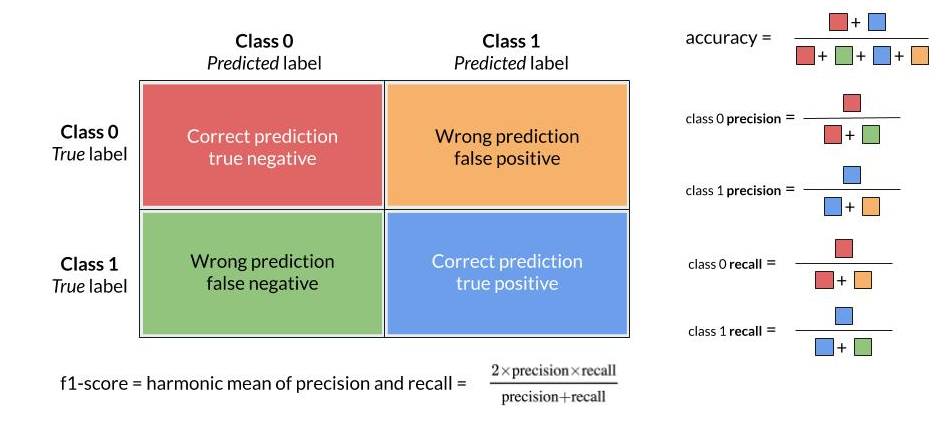

Une précision et un rappel élevé : La classe a été bien gérée par le modèle
Une précision élevée et un rappel bas : La classe n'est pas bien détectée mais lorsqu'elle l'est, le modèle est très fiable.
Une précision basse et un rappel élevé : La classe est bien détectée, mais inclus également des observations d'autres classes.
Une précision et un rappel bas : la classe n'a pas du tout été bien gérée

In [ ]:
# Module 1 - Jeux de données déséquilibrés


# A -------------------------------------------------------------------------------- Préparation et modélisation des données

# 1 - import ---------------------------------------------------------------------------------

import pandas as pd   
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,  ClusterCentroids
from imblearn.metrics import classification_report_imbalanced, geometric_mean_score
from sklearn.metrics import f1_score
from sklearn.svm import SVC


# 2 - Lire le fichier "churn_train.csv" dans un data frame et en afficher les premières lignes ----
df = pd.read_csv('churn_train.csv')
df.head()


# 3 - Supprimer les colonnes CustomerId, Surname, Geography du data frame. ------------------------
df.drop(columns = ['CustomerId', 'Surname', 'Geography' ],inplace = True)


# 4 - Transformer la variable NumOfProducts en type 'object'. -------------------------------------
#Encoder les modalités de la variable Gender('Male', 'Female') par 0 et 1.
df['NumOfProducts'] = df['NumOfProducts'].astype ( 'object')
df['Gender'] = df['Gender'].replace( to_replace = ['Male', 'Female'], value=  [0,1] )


# 5 - Séparer les données en un data frame feats contenant les variables explicatives et target contenant la variable Excited
data = df.drop('Exited', axis = 1)   #data
target = df['Exited']   #target


# 6 - Transformer la variable NumOfProducts en plusieurs variables indicatrices à l'aide de la fonction get_dummies 
data = data.join (pd.get_dummies(df['NumOfProducts'],prefix = 'product'))
data.drop (columns = 'NumOfProducts', inplace = True)


# 7 - Créer un ensemble d'entraînement et un ensemble de test ------------------------------------------
X_train,X_test, y_train,y_test = train_test_split (data,target,test_size = 0.25)


# 8 - Appliquer une standardisation des variables continues ('CreditScore', 'Age', 'Balance', 'EstimatedSalary')
from sklearn import preprocessing 

cols = ['CreditScore','Age','Balance','EstimatedSalary']   #colonnes a normaliser 

X_train [cols] = StandardScaler().fit_transform( X_train [cols] )
X_test [cols]  = StandardScaler().fit_transform( X_test [cols] )


# 9 - distribution en pourcentage de la variable cible. --------------------------------------------
target.value_counts(normalize = True)

# 10 - Créer un modèle de classification SVM, en ajoutant l'argument gamma = 'scale'. ----------------
svm_clf01 = SVC( gamma = 'scale')

# 11 - Entraîner le modèle sur l'ensemble d'entraînement, puis afficher le score obtenu sur l'ensemble de test. 
svm_clf01.fit(X_train, y_train)

svm_clf01.score( X_test, y_test )


# 12 - les prédictions de notre modèle sur les données de test, et afficher la matrice de confusion correspondante.
y_pred = svm_clf01.predict (X_test)
pd.crosstab ( y_test,y_pred , rownames= ['Real'] ,
    colnames=['Pred'])

# 13 - le rapport d'évaluation du modèle -------------------------------------------------------------------------
print (classification_report_imbalanced(y_test, y_pred))
#pre : presicion 
#re : recall 
#f1 : F1-score permet de mesurer la précision et le rappel
#plus de details -> https://imbalanced-learn.readthedocs.io/en/stable/api.html#module-imblearn.metrics

# 14 - Analyse du rapport d'évaluation du modèle -----------------------------------------------------------------

# Le tableau précedent montre que le rappel et le f1-score de la classe 1 sont mauvais, 
# tandis que pour la classe 0, ils sont élevés. 

# Des méthodes dites de rééchantillonnage permettent de modifier les données avant d'entraîner le modèle dessus. 
# Ces méthodes se divisent en 2 groupes principaux: les méthodes de sur-échantillonnage (Oversampling) 
# et de sous-échantillonnage (Undersampling).


# B -------------------------------------------------------------------------------- Sur-échantillonnage (Oversampling) 

# 1 - Creation de deux nouveaux ensemble de données (X_ro, y_ro) et (X_sm, y_sm) 
#obtenus réspectivement par Oversampling aléatoire (RandomOverSampler) et SMOTE (SMOTE)

rOs = RandomOverSampler()                       #RandomOverSampler pour effectuer l Oversampling
X_ro, y_ro = rOs.fit_resample(X_train, y_train) #slm sur l ensemble train

smo = SMOTE()                                   #SMOTE  pour effectuer l Oversampling
X_sm, y_sm = smo.fit_resample(X_train, y_train) #slm sur l ensemble train

# 2 - Afficher le nombre d'éléments de chaque classe du nouvel ensemble obtenu
print("Classes échantillon oversampled :", dict(pd.Series(y_ro).value_counts()))  #combien de value = 1 et =0 
print("Classes échantillon SMOTE :", dict(pd.Series(y_sm).value_counts()))        # pour chaque elements

# 3 - pour RandomOverSampler : creer un modele de classification SVM, l entrainer, matrice de confusion 
#et le rapport de résultat sur l'ensemble de test obtenu par classification_report_imbalanced
svm_clf02 = SVC ( gamma = 'scale' )  #modele
svm_clf02.fit ( X_ro, y_ro)  #entrainement 
y_pred = svm_clf02.predict(X_test)  #prediction
pd.crosstab(y_test,y_pred,rownames= ['real'] , colnames=['pred'] ,) #matrice de confusion
print (classification_report_imbalanced(y_test, y_pred))  #le rapport de résultat sur l'ensemble de test

# 4 - pour SMOTE : creer un modele de classification SVM, l entrainer, matrice de confusion 
#et le rapport de résultat sur l'ensemble de test obtenu par classification_report_imbalanced
svm_clf03 = SVC (gamma = 'scale')
svm_clf03.fit(X_sm, y_sm)
y_pred = svm_clf03.predict (X_test)
pd.crosstab ( y_test,y_pred,  rownames= ['real'] ,
    colnames=['pred'], )



# C -------------------------------------------------------------------------------- Sous-échantillonnage (undersampling) 

# 1 - Creation de deux nouveaux ensemble de données (X_ro, y_ro) et (X_sm, y_sm) 
#obtenus réspectivement par RandomUnderSampler et ClusterCentroids

#RandomUnderSampler
rUs = RandomUnderSampler()
X_ru, y_ru = rUs.fit_resample(X_train, y_train)

#Centroids
cc = ClusterCentroids()
X_cc, y_cc = cc.fit_resample(X_train, y_train)


# 2 - Afficher le nombre d'éléments de chaque classe du nouvel ensemble obtenu
print("Classes échantillon undersampled :", dict(pd.Series(y_ru).value_counts()))
print("Classes échantillon CC :", dict(pd.Series(y_cc).value_counts()))


# 3 - pour RandomUnderSampler : creer un modele de classification SVM, l entrainer, matrice de confusion 
#et le rapport de résultat sur l'ensemble de test obtenu par classification_report_imbalanced
svm_cf04 = SVC (gamma = 'scale')

svm_cf04.fit(X_ru, y_ru)
pd.crosstab( y_test,svm_cf04.predict(X_test) , rownames= ['real'] , colnames=['predict'])
print( classification_report_imbalanced (y_test,svm_cf04.predict(X_test)) )


# 4 - pour ClusterCentroids : creer un modele de classification SVM, l entrainer, matrice de confusion 
#et le rapport de résultat sur l'ensemble de test obtenu par classification_report_imbalanced
svm_cf05 = SVC (gamma = 'scale')

svm_cf05.fit(X_cc, y_cc )
pd.crosstab( y_test,svm_cf05.predict(X_test) , rownames= ['real'] , colnames=['predict'])
print( classification_report_imbalanced (y_test,svm_cf05.predict(X_test)) )


# D ----------------------------------------------------------------------------------------------- Solutions complementaires 

# 1 - parametre : threshold -------------------------------------------------------------------------
# prédire la grande majorité des churners potentiels, quitte à mal classer les non-churners (var = target)
svm = SVC(probability= True, gamma ='scale') # 'probability= True' est nécessaire pour retourner les probas
svm.fit(X_ru, y_ru)                         # mais ralentit l'entraînement
threshold = 0.5 # Tester avec 0.4, 0.6, ...
probs = svm.predict_proba(X_test)   # prediction
pred_class =  (probs[:,1] >= threshold).astype('int')
pd.crosstab(y_test, pred_class) #table de confusion


# 2 - parametre : class_weight= "balanced ------------------------------------------------------------
#permet de pénaliser les erreurs faites sur une classe par un nouveau poids. 
#Plus le poids d'une classe est important, plus les erreurs sur cette classe sont pénalisées

svm = SVC(gamma ='scale', class_weight= "balanced")
svm.fit(X_train, y_train)                         
preds = svm.predict(X_test)
pd.crosstab(y_test, preds)


# 3 - changer de class avec  le sous-package imblearn.ensemble --------------------------------------------
from imblearn.ensemble import BalancedRandomForestClassifier

bclf = BalancedRandomForestClassifier()
bclf.fit(X_train, y_train) 
y_pred = bclf.predict(X_test)
pd.crosstab(y_test, y_pred)

In [ ]:
# Module 2 - Sélection de modèles


# A -------------------------------------------------------------------------------- Préparation et modélisation des données

# 1 - import ---------------------------------------------------------------------------------

from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import pandas as pd

data = pd.read_csv('mobile_train.csv')   #csv 

X, y = data.drop('price_range', axis=1), data.price_range    #data target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)  #train tqest split


# B -------------------------------------------------------------------------------- Préparation et modélisation des données

# 1 - normalisation ---------------------------------------------------------------------------
X_train = MinMaxScaler().fit_transform(X_train)  #normalisation
X_test = MinMaxScaler().transform(X_test) #normalisation


# 2 - classe gridcv de GridSearchCV, avec clf_lr, les paramètres de params_lr -----------------------
clf_lr  = LogisticRegression(max_iter=1000)   #classifieur clf_lr, de la classe LogisticRegression

params_lr  = {'solver': ['liblinear', 'lbfgs'],              #dictionnaire `params_lr` avec les hyperparamètres
                   'C': [10**(i) for i in range(-4,3)]}

gridcv = GridSearchCV(clf_lr,                       #classe GridSearchCV`, avec clf_lr et paramètres 
                       param_grid=params_lr,
                       scoring='accuracy',
                       cv=3) 

# 3 - Entraîner gridcv -------------------------------------------------------------------------------

gridcv.fit( X_train,y_train )  #Entraîner

gridcv.score( X_test,y_test ) #score

# résultats du Grid Search grâce à l'attribut cv_results_( il faut le transformer en df)
# on se contentera d'afficher les colonnes 'params', 'mean_test_score' et 'std_test_score'
pd.DataFrame (  (gridcv.cv_results_) )[['params', 'mean_test_score' , 'std_test_score'] ]


#analyse des results 
#selection du jeu de param le plus efficace (mean le + eleve et std le - eleve)

# C --------------------------------------------------------------------------- Validation croisée imbriquée (Nested CV)

# 1 - classificateur + param ------------------------------------------------------------
import numpy as np

lr_cl01 = LogisticRegression (random_state=22, max_iter=2000)  #classificateur
rf_cl02 = RandomForestClassifier (random_state=22)             #classificateur
svc_cl03 = SVC (random_state=22)                                #classificateur

#jeu de param

param_grid_lr  = {'solver': ['liblinear', 'lbfgs'],
                     'C': np.logspace(-4,2,9)}

param_grid_rf  = [{'n_estimators': [10, 50, 100, 250, 500, 1000],
                     'min_samples_leaf': [1, 3, 5],
                     'max_features': ['sqrt', 'log2']}]

param_grid_svc = [{'kernel': ['rbf'],
                     'C': np.logspace(-4, 4, 9),
                      'gamma': np.logspace(-4, 0, 4)},
                    {'kernel': ['linear'],
                     'C': np.logspace(-4, 4, 9)}]

# 2 - GridSearchCV ----------------------------------------------------------------------

gridcvs = {}    #creation d un dictionnaire vide

for pgrid, clf, name in zip((param_grid_lr,                       #boucle avec classificateur,param et nom du classificateur
                             param_grid_rf, param_grid_svc),
                            (clf_lr, clf_rf, clf_svc),
                            ('LogisticRegression', 'RF', 'SVM')):
    gcv = GridSearchCV(clf,                                       # GridSearchCV avec classificateur et param
                       pgrid,
                       cv=3,
                       refit=True)
    
    gridcvs[name] = gcv    #'enregistrer comme élément de gridcvs avec une clé correspondant au nom l'algorithme utilisé

pd.DataFrame (gridcvs.items())  #affiche les elements du dict

# 3 - Trouve le meuilleur algo ----------------------------------------------------------------------
#Créer un objet StratifiedKFold, (nombre d'achantillonnage = 3 et argument shuffle=True.)
outer_cv = StratifiedKFold(n_splits=3, shuffle=True)
outer_scores = {}

#Pour chaque couple (clé, valeur) de gridcvs, contenant le nom du modèle et le Grid Search associé:
    #Calculer les scores obtenus par validation croisée startifiée à 3 splits.
    #Sauvegarder les scores retournés dans outer_scores, avec la même clé correspondant au nom du modèle.
    #Afficher, pour chaque modèle la moyenne des scores obtenus +/- l'écart type.
for name, gs in gridcvs.items():
    nested_score = cross_val_score(gs, 
                                   X_train, 
                                   y_train, 
                                   cv=outer_cv)
    outer_scores[name] = nested_score 
    print(f'{name}: outer accuracy {100*nested_score.mean():.2f} +/- {100*nested_score.std():.2f}')  #affiche le result
    
# 4 - Efficacite ----------------------------------------------------------------------

from sklearn.metrics import accuracy_score

final_clf = gridcvs['LogisticRegression']     #choix du meilleur algo dans le dictionnaire
final_clf.fit(X_train, y_train)             #entrainemetn

print(f'Best Parameters: {final_clf.best_params_}')   #choix du meilleur param 

train_acc = accuracy_score(y_true=y_train, y_pred=final_clf.predict(X_train))  #accuracy de l'ens. d entrainement
test_acc = accuracy_score(y_true=y_test, y_pred=final_clf.predict(X_test))     #accuracy de l ens. reel

print(f'Training Accuracy: {100*train_acc:.2f}')   
print(f'Test Accuracy: {100*test_acc:.2f}')



In [ ]:
# Module 3 - Détection d'anomalies


# A -------------------------------------------------------------------------------- Préparation et modélisation des données

# 1 - import ---------------------------------------------------------------------------------
# Exécuter cette cellule pour charger les modules nécessaires 
import numpy as np
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn import svm
from sklearn.datasets import make_moons, make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report


df = pd.read_csv('transactions.csv')
df


# 2 - pourcentage  ---------------------------------------------------------------------------------
print (df["Class"].value_counts())

target.value_counts()   #

sns.countplot ( target) #trace


# 3 - target -------------------------------------------------------------------------------------
target = df["Class"]

target.replace( [1,0], [-1,1], inplace = True)


# 4 - frac la proportion d'outliers --------------------------------------------------------------
frac = df[df['Class']==-1] ['Class'].count() / df['Class'].count()


# 5 - train_test_split ---------------------------------------------------------------------------
from sklearn.model_selection import train_test_split
target = df["Class"]
X_train, X_test, y_train, y_test= train_test_split(df,target, test_size=.2,random_state = 87)
X_train = X_train.drop("Class", axis = 1)
X_test = X_test.drop("Class", axis = 1)

# 6 - supprimer une colonne ---------------------------------------------------------------------------
X_train_notime = X_train.drop("Time", axis =1)
X_test_notime = X_test.drop("Time", axis =1)



# B ---------------------------------------------------------------------------------------------------- Enveloppe elliptique

# 1 - objet EllipticEnvelope ---------------------------------------------------------------------------
#Instancier un objet EllipticEnvelope du sous-module sklearn.covariance. #distribution normale
#Entrainer le modèle avec l'échantillon d'apprentissage avec les paramètres suivants :
#contamination = frac un niveau de contamination égal à la proportion d'outliers dans notre échantillon.
#support_fraction = 1-frac qui indique la proportion d'observations à utiliser pour l'estimation des paramètres 
#de la distribution. On utilisera donc (1-frac)% des observations, les derniers pourcents sont ignorés.

ell_env = EllipticEnvelope(contamination = frac, support_fraction = 1-frac)  #creation clf  objet EllipticEnvelope
# On remarque que les labels ne sont pas utilisés dans la phase d'apprentissage pour ce modele
ell_env.fit(X_train_notime) #   Entrainer le modèle avec l'échantillon d'apprentissage

# 2 - Prédire les labels ---------------------------------------------------------------------------

y_pred = ell_env.predict(X_test_notime)  # Prédiction à l'aide de l'échantillon de test

pd.crosstab(y_test,y_pred, rownames = ["Classes réelles"], colnames = ["Classes prédites"])# Matrice de confusion

print(classification_report(y_test,y_pred))  #rapport de classification

# 3 - GridSearchCV pour trouver la proportion d'outliers dans l'échantillon -------------------------

#Définir un dictionnaire par_grille par_grille = {"contamination": [0.001,0.02,0.03]}
#Instancier un objet f1sc avec la méthode make_scorer qui prendra en argument f1_score du module sklearn.metrics.
#Créer un objet GridSearchCV prenant en argument un objet EllipticEnvelope (avec support_fraction = 0.97), 
#la grille de paramètres par_grille, la fonction de score créée précédemment ainsi que les folds de la validation.
#Trouver le paramètre contamination optimale dans cette fenêtre de valeurs


# Faire des échantillons de test de même proportion que ceux d'apprentissage 
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import make_scorer, recall_score

# On pourrait utiliser plusieurs valeurs pour le paramètre support_fraction
ell_env = EllipticEnvelope(support_fraction = 0.97)

# échantillons de validation croisée stratifiées
skf = StratifiedKFold(n_splits=3)
folds = list(skf.split(X_train_notime, y_train))

# On utilise ici le f1_score avec comme paramètre average = 'macro' qui effectue simplement la moyenne du recall et précision
f1sc = make_scorer(f1_score,average='macro')

# Grille de paramètres pour la GridSearch
par_grille = {"contamination": [0.001,0.02,0.03]}

# Création et entraînement de la GridSearchCV
search = GridSearchCV(estimator=ell_env, param_grid=par_grille, scoring=f1sc, cv=folds, verbose = 2)
search.fit(X_train_notime, y_train)


# 3 - prediction + tab de confuesion + rapport --------------------------------------------------------------
y_pred = search.predict(X_test_notime)   #presdiction

pd.crosstab(y_test,y_pred, rownames = ["Classes réelles"], colnames = ["Classes prédites"])   # table de confusion

print(classification_report(y_test,y_pred))   #rapport 


# C ---------------------------------------------------------------------------------------------------- Isolation forest

# 1 - Instancier un objet IsolationForest --------------------------------------------------------------

isof = IsolationForest(contamination = 0.02, random_state = 1234, n_estimators = 150, n_jobs = -1)

# 2 - prediction + tab de confuesion + rapport --------------------------------------------------------------
isof.fit(X_train_notime)

y_pred = isof.predict(X_test_notime)

pd.crosstab(y_test, y_pred, rownames = ["Classes réelles"], colnames = ["Classes prédites"])

print(classification_report(y_test,y_pred))

# 2 - GridSearchCV --------------------------------------------------------------------------------------------

# On découpe manuellement nos jeu de données de validation croisée au sein de l'échantillon d'apprentissage

skf = StratifiedKFold(n_splits=3) #

folds = list(skf.split(X_train_notime, y_train))

forest = IsolationForest()  #modele isol forest

# Dans la situation où on ne connait pas à priori le paramètre de contamination,
# on ajoutera la contamination dans la grille de recherche

resc = make_scorer(recall_score,pos_label = -1)  

params = {"contamination":np.linspace(0.002,0.05,10)}   #jeu de parametres

search = GridSearchCV(estimator=forest, param_grid=params, scoring=resc, cv=folds, n_jobs=-1)    #gridcv

search.fit(X_train_notime, y_train)   #entrainement

# predict
optimal_forest = search.best_estimator_   #selection modele et jeu

y_pred = optimal_forest.predict(X_test_notime) # prediction 

pd.crosstab(y_test,y_pred, rownames = ["Classes réelles"], colnames = ["Classes prédites"])  #table confusion

print(classification_report(y_test,y_pred))   #report


# D ---------------------------------------------------------------------------------------------------- Local Outlier Factor

# 1 - Instancier un objet LocalOutlierFactor du module neighbors ---------------------------------------

lof = LocalOutlierFactor(novelty = True, contamination = frac, n_jobs = -1, n_neighbors = 160)

# 2 - prediction + tab de confuesion + rapport --------------------------------------------------------------

lof.fit(X_train_notime)

y_pred =lof.predict(X_test_notime)

pd.crosstab(y_test,y_pred, rownames = ["Classes réelles"], colnames = ["Classes prédites"])

print(classification_report(y_test,y_pred))


#analyse : le modele est bon ou pas (dans le cas il est bon pour les outliers mais n arrive pas a detecter les outliers)


# 3 - Instancier un objet LocalOutlierFactor --------------------------------------------------------------

#semblable au précédent à l'exception près de : contamination = 0.02
#Prédire les labels de l'échantillon de test et afficher le rapport de classification

lof2 = LocalOutlierFactor(novelty = True, contamination = 0.02, n_jobs = -1, n_neighbors = 160)

lof2.fit(X_train_notime)

y_pred =lof2.predict(X_test_notime)

pd.crosstab(y_test,y_pred, rownames = ["Classes réelles"], colnames = ["Classes prédites"])



# E ---------------------------------------------------------------------------------------------------- One Class SVM

# 1 - train_inliers, stocker les variables explicatives des observations associées au label 1

# On sélectionne uniquement les labels qui correspondent à 1
y_inliers=y_train[y_train.values == 1]

# On créer une liste d'index pour pouvoir récupérer les variables explicatives de ces index
liste = list(y_inliers.index.values)

# On récupère ces variables explicatives dans un nouveau dataframe
train_inliers = X_train.loc[liste]



#SVM = standardisation des données

# 2 - Standartisation ---------------------------------------------------------------------------
#Instancier un objet MinMaxScaler du sous-module sklearn.preprocessing pour standardiser les données entre  [−1,1][−1,1] .
#Utiliser la méthode fit associée sur train_inliers.
#Transformer train_inliers et X_test à l'aide de ce scaler.

from sklearn.preprocessing import MinMaxScaler
# Création de l'objet Scaler
scaling = MinMaxScaler(feature_range=(-1,1)).fit(train_inliers)

# Entrainement du scaler à partir du dataset utilisé dans la phase d'apprentissage
train_inliers = scaling.transform(train_inliers)

# On transforme X_test avec les informations du dataframe d'apprentissage
X_test = scaling.transform(X_test)


# 3 - Instancier un objet de type OneClassSVM + entrainer ---------------------------------------

from sklearn.metrics import f1_score, make_scorer
# On définit l'objet OneClassSVM
clf_osvm = svm.OneClassSVM(kernel = 'rbf', nu = 0.005,gamma = "scale")

# Entrainement du modèle
clf_osvm.fit(train_inliers)

# Prédiction à partir des variables explicatives de l'échantillon de test
y_pred = clf_osvm.predict(X_test)

# Affichage des résultats sous la forme d'une matrice de confusion
pd.crosstab(y_test,y_pred, rownames =["Classes réelles"], colnames = ["Classes prédites"])

# Afficher le rapport de classification de la prédiction
print(classification_report(y_test, y_pred))


#Stocker dans une liste liste_res les prédictions de modèles OCSVM
gam = np.linspace(2,5.5,7)
liste_res = []
for g in gam : 
    clf = svm.OneClassSVM(kernel = "rbf", nu = 0.0017, gamma =g)
    clf.fit(train_inliers)
    liste_res.append(clf.predict(X_test))

#paramètre prédit le mieux les outliers
pd.crosstab(y_test,liste_res[3],rownames =["Classes réelles"], colnames = ["Classes prédites"]) 
print(classification_report(y_test, liste_res[6]))

Resumé : 

L'elliptical envelope est une méthode qui estime les paramètres d'une gaussienne de manière robuste, elle nécessite un grand jeu de données pour que l'approximation gaussienne soit légitime.

L'isolation forest est une méthode originale utilisant les arbres de décisions pour détecter des anomalies de façon intuitive.

Le Local Outlier Factor est une méthode se basant sur le principe de densité locale. De nouvelles techniques se sont développées récemment pour trouver automatiquement le paramètre de contamination. Mais de manière générale, il est déterminé par l'information de précédentes études par exemple.

La One Class SVM est une méthode populaire mais très sensible au tuning de ses paramètres, notamment ceux du noyau considéré. Il peut s'avérer assez long d'effectuer une grille de recherche sur les différents paramètres, d'où l'importance de bien utiliser un scaler sur les variables explicatives.

In [ ]:
# Module 4 - Classification semi-supervisée


# A -------------------------------------------------------------------------------- Préparation et modélisation des données

# 1 ----------------------------------------------------------- import

# Import des bibliothèques nécessaires
from sklearn.semi_supervised import LabelSpreading
from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score
from scipy.sparse.csgraph import connected_components
import pandas as pd

# Lecture du fichier "hiva.csv"
df = pd.read_csv("hiva.csv")


# 2 ----------------------------------------------------------- Label
# Calcul nombre des instances non labellisées
df['Class'].isnull().sum()

# Séparation des données labellisées et non labellisées
labeled_data = df[(df['Class'] == 1) | (df['Class'] == 0)]
unlabeled_data = df[(df['Class'] != 1) & (df['Class'] != 0)]


# 3 ----------------------------------------------------------- separer
# Décomposition des données en deux ensembles d'entraînement et de test.
test = labeled_data.iloc[:1600,:]
train = pd.concat([labeled_data.iloc[1600:,:], unlabeled_data])

#Les échantillons seront aléatoirement répartis entre le jeu d'entraînement et le jeu de test, 
#et la taille du jeu de test doit correspondre à 20 % de la quantité totale des données disponibles, 
#soit 1600 observations pour tester le modèle de classification

# 4 ----------------------------------------------------------- Création des matrices data target
#Création des matrices de features et des données cibles pour les données d'entrainement et de test
X_test = test.iloc[:, 1:] 
y_test = test['Class']

X_train = train.iloc[:, 1:]
y_train = train['Class']


# 5 ----------------------------------------------------------- action sur observations non labelisées
# Étiqueter à -1 les observations non labellisées
y_train.isnull().sum()
y_train.fillna( -1.0,inplace = True)



# B --------------------------------------------------------------------------- Algorithme de classification semi-supervisée

# 1 ----------------------------------------------------------- Classificateur label_model

# Création du classifier et construction du modèle sur les données d'entraînement
label_model = LabelSpreading(n_neighbors=7, kernel='knn', max_iter=10, gamma = 0.20)   #Classificateur label_model
label_model.fit(X_train, y_train)         #Entraîner l'algorithme sur l'ensemble d'entraînement (X_train et y_train)

# C -------------------------------------------------------------------------------- Évaluation du modèle de classification

# 1 ----------------------------------------------------------- predict + table confusion
y_pred = label_model.predict(X_test)
pd.crosstab(y_test, y_pred)

# 2 ---------------------------------------------------- Calcul du coefficient Cohen Kappa
# Calcul du coefficient Cohen Kappa
cohen_kappa_score(y_test, y_pred)



Le coefficient  κκ  se calcule comme suit :
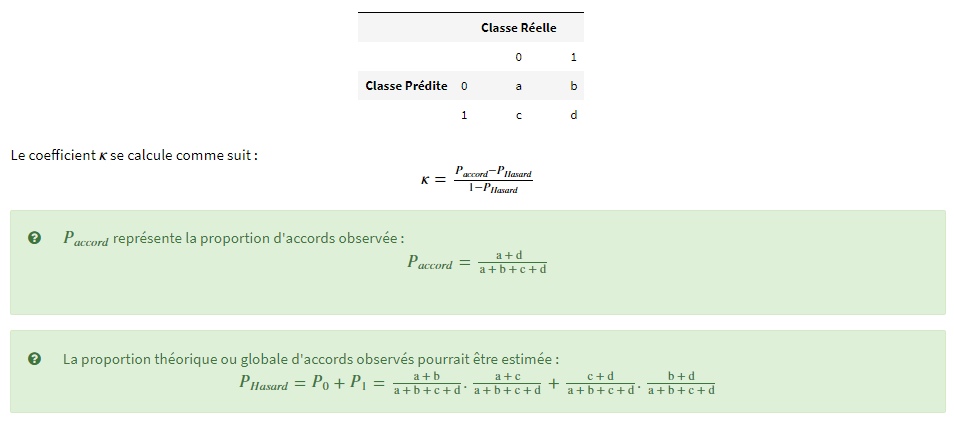

In [ ]:
# Module 5 - Persistance de modèles


# A -------------------------------------------------------------------------------- Préparation et modélisation des données

# 1 ----------------------------------------------------------- import

import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import pickle

df = pd.read_csv('wine.csv')


# 2 ----------------- classifieur de classe RandomForest et l'entraîner
from sklearn import model_selection

X = df.drop("Alcohol", axis=1)
Y = df.Alcohol

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)


# 3 ------------------------ Charger le modèle sous le nom 'loaded_model'.
from joblib import dump, load

dump(model, 'md.joblib')


loaded_model = load('md.joblib')

loaded_model.predict(X_test)

loaded_model.score(X_test, y_test)

Examen 

Classification avancée avec scikit-learn

Une banque nationale met un point d'honneur à rechercher des moyens pour aider ses clients à comprendre leur santé financière et à identifier les produits et services qui pourraient les aider à atteindre leurs objectifs.

L'objectif de cette évaluation est d'aider à identifier les clients de la banque qui effectueront une transaction spécifique à l'avenir, quel que soit le montant de la transaction.

Vous disposez d'un ensemble de données anonymisées contenant des variables numériques ainsi que la variable cible binaire (target).
Cet ensemble de données est séparé en un ensemble d'entraînement (train.csv) et un ensemble de test (test.csv).

Un jeu de données supplémentaire (unlabeled.csv) contient des données supplémentaires mais non labélisées.

La tâche consiste à construire un modèle capable de prédire au mieux la valeur de la colonne cible sur l'ensemble de test.

Un premier modèle de Random Forest a éte entraîné sur l'ensemble d'entraînement, disponible dans le fichier 'model.joblib'.

Charger les jeux de données d'entraînement et de test.
Charger le modèle pré-entraîné, et évaluer le taux de bonnes prédictions sur l'ensemble de test.

Quel est le score du modèle? Cette métrique est-elle pertinente pour notre problème de classification?

Proposer un meilleur modèle pour détecter les transactions, et l'évaluer avec une métrique plus adaptée.

In [ ]:
Corrige partiel


Examen 

Classification avancée avec scikit-learn

Une banque nationale met un point d'honneur à rechercher des moyens pour aider ses clients à comprendre leur santé financière et à identifier les produits et services qui pourraient les aider à atteindre leurs objectifs.

L'objectif de cette évaluation est d'aider à identifier les clients de la banque qui effectueront une transaction spécifique à l'avenir, quel que soit le montant de la transaction.

Vous disposez d'un ensemble de données anonymisées contenant des variables numériques ainsi que la variable cible binaire (target).
Cet ensemble de données est séparé en un ensemble d'entraînement (train.csv) et un ensemble de test (test.csv).

Un jeu de données supplémentaire (unlabeled.csv) contient des données supplémentaires mais non labélisées.

La tâche consiste à construire un modèle capable de prédire au mieux la valeur de la colonne cible sur l'ensemble de test.

Un premier modèle de Random Forest a éte entraîné sur l'ensemble d'entraînement, disponible dans le fichier 'model.joblib'.

Charger les jeux de données d'entraînement et de test.
Charger le modèle pré-entraîné, et évaluer le taux de bonnes prédictions sur l'ensemble de test.

In [ ]:
import pandas as pd  
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [ ]:
from joblib import dump, load

In [ ]:
loaded_model = load('model.joblib')

In [ ]:
target_train = df_train[ 'target' ]
data_train   = df_train.iloc[ 0: , 1: ]

In [ ]:
loaded_model

In [ ]:
loaded_model.fit( data_train , target_train )

In [ ]:
target_test = df_test[ 'target' ]
data_test   = df_test.iloc[ 0: , 1: ]

In [ ]:
y_pred = loaded_model.predict (data_test)

pd.crosstab( target_test , y_pred , rownames =["real"], colnames = ["préd"] )

Quel est le score du modèle? Cette métrique est-elle pertinente pour notre problème de classification?

In [ ]:
loaded_model.score ( data_test , target_test )

In [ ]:
target_test.value_counts ( normalize = True)

In [ ]:
le score est tres satisfaisant mais avec la table de confusion on s apercoit que c est satisfesant seulement pour la classe dominante 

ce modele ne predit pas la classe 1 (trop faible dans les jeux de données) la presicion est = 0 dans sa classification_report

In [ ]:
from sklearn.metrics import classification_report

print ( classification_report ( target_test , y_pred ) )

Proposer un meilleur modèle pour détecter les transactions, et l'évaluer avec une métrique plus adaptée.

In [ ]:

from imblearn.ensemble import BalancedRandomForestClassifier

In [ ]:
bclf = BalancedRandomForestClassifier()


In [ ]:
bclf.fit(data_train , target_train)

In [ ]:
y_pred = bclf.predict(data_test)
pd.crosstab(target_test , y_pred , rownames =["real"], colnames = ["préd"] )



In [ ]:
print ( classification_report ( target_test , y_pred ) )